In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
real_data = pd.read_csv('../datasets/data/boston.txt',)

In [6]:
real_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


concrete_strength
inutility
2 0
disclosure_averseness
2 0


boston
inutility
0 0
disclosure_averseness
2 0


airfoil
inutility
2 0
disclosure_averseness
4 0


bioav
inutility
0 0
disclosure_averseness
4 0

In [15]:
syn_data_inu = pd.read_csv('../log/20250515/boston_0_0.csv', index_col = 0)
syn_data_da = pd.read_csv('../log/20250515/boston_4_0.csv', index_col = 0)

In [13]:
syn_data_inu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-15.801486,0.732155,2.503743,-0.857281,-1.716153,-0.343322,-2.506104,0.14112,0.514848,0.999972,5.007487,-0.007487,-1.583357,0.618833
1,-1.631956,0.217633,2.244459,-0.635310,-1.241988,-0.229470,-0.573082,0.14112,0.772257,0.872216,4.463556,0.560182,-0.499886,0.791948
2,-24.810312,0.948770,2.866610,-0.033446,0.063920,-0.011151,2.069525,0.14112,0.999440,0.743023,5.823045,-0.881145,3.879898,-0.013111
3,-6.208089,0.988940,2.835642,-0.989650,0.037228,-0.475598,-17.521658,0.14112,0.143504,0.783024,5.735939,-0.786839,6.000221,-0.776257
4,3.425143,0.938891,2.687851,0.229963,-0.105760,0.077347,-2.512165,0.14112,0.973199,0.930250,5.385154,-0.394388,-5.324690,0.490870


In [16]:
syn_data_da.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.416934,0.088518,0.797039,0.043724,0.992895,5.0,0.992827,-0.113670,0.404150,0.014951,-0.386407,0.0,-0.458736,0.304670
1,-0.507177,0.075208,0.679822,0.060759,0.993024,5.0,0.992959,-0.106695,0.315546,0.037981,-0.452778,0.0,-0.536488,-0.060152
2,-1.320552,-0.443070,0.241480,0.144231,0.684349,5.0,0.484090,1.472895,0.905078,0.247531,-0.389137,0.0,-0.790735,0.986189
3,-0.542813,-0.556531,1.092032,0.012647,0.836466,5.0,0.792951,1.473869,1.327177,2.628917,-0.700779,0.0,-0.250132,0.999992
4,-0.156639,-0.929516,1.850641,0.022178,0.552354,5.0,0.061563,-7.099094,2.321777,-0.358728,-0.305649,0.0,0.329870,0.999471


In [51]:
def compare_dist(syn_data, real_data):
    
    real_min = real_data.min()
    real_max = real_data.max()
    syn_min = orig_syn.min()
    syn_max = orig_syn.max()
    
    # Min-max scale synthetic data to real_data.MEDV range
    scaled_syn = (syn_data - syn_min) / (syn_max - syn_min) * (real_max - real_min) + real_min
    
    # Plotting
    fig, ax = plt.subplots()
    
    # Real data histogram
    ax.hist(real_data, bins=30, alpha=1, label='Real Data', color='blue')
    
    # Synthetic data line histogram
    y, binEdges = np.histogram(scaled_syn, bins=30)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    ax.plot(bincenters, y, '-', c='orange', label='Synthetic Data')
    
    # Labels and title
    ax.set_xlabel('Values (Real & Scaled Synthetic)')
    ax.set_ylabel('Frequency')
    ax.set_title('Overlay of Real and Synthetic MEDV Distributions')
    ax.legend()
    
    # Define transformation functions
    def forward(x):  # from synthetic original to scaled (real MEDV range)
        return (x - syn_min) / (syn_max - syn_min) * (real_max - real_min) + real_min
    
    def inverse(x):  # from real MEDV range back to original synthetic scale
        return (x - real_min) / (real_max - real_min) * (syn_max - syn_min) + syn_min
    
    # Add secondary x-axis for original synthetic values
    secax = ax.secondary_xaxis('top', functions=(inverse, forward))
    secax.set_xlabel('Original Synthetic Values')
    
    plt.show()


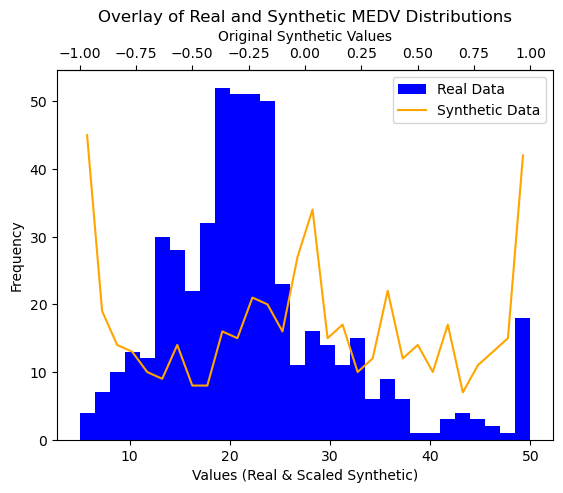

In [52]:
compare_dist(syn_data_inu.iloc[:, 13].values, real_data.MEDV)

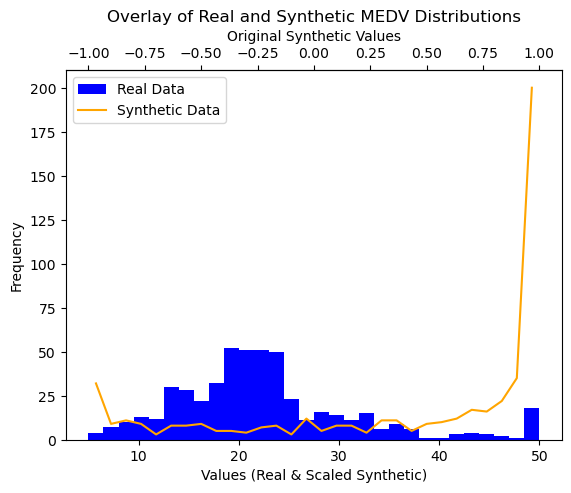

In [53]:
compare_dist(syn_data_da.iloc[:, 13].values, real_data.MEDV)